# Ejercicio 6 - guía 3

Generar 𝑛 = 100 samples de 𝑋1 ∼ U (0, 1), de 𝑍 ∼ N (0, 0.1) y de 𝜀 ∼ N (0, 1); a partir de ellas
generar 𝑛 samples de 𝑋2:= 0.5𝑋1 + 𝑍 y de

* 𝑌 := 2 + 2𝑋1 + 0.3𝑋2 + 𝜀.

## a)
Calcular la correlación entre las muestras de 𝑋1 y 𝑋2, y graficar su distribución conjunta.

### Desarrollo

Primero tomo los samples y los guardo en un dataframe para mejor manipulación:

In [1]:
import pandas as pd 
from scipy.stats import norm
from scipy.stats import uniform

# Defino la cantidad de samples
n = 100

# Defino las variables que contienen a los samples
X1 = uniform.rvs(loc=0, scale=1, size= n)
Z = norm.rvs(loc=0, scale=0.1, size= n)
e = norm.rvs(loc=0, scale=1, size= n)
X2 = 0.5*X1 + Z
Y = 2 + 2*X1 + 0.3*X2 + e	# Var dependiente

# Armo un diccionario con los samples para luego convertirlo a dataframe
samples = {
    'X1' : X1,
    'Z' : Z,
    'e' : e,
    'X2' : X2,
    'Y' : Y
}
df_samples = pd.DataFrame(samples)

Calculo la correlación de las muestras X1 y X2:

In [2]:
print(df_samples['X1'].corr(df_samples['X2']))

0.812751554548086


Ahora hago el gráfico de la distribución conjunta:

<Axes: xlabel='X1', ylabel='X2'>

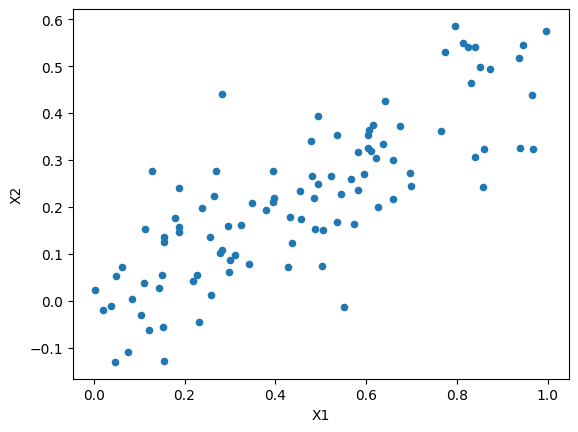

In [3]:
df_samples.plot.scatter(x='X1', y='X2')

## b)
Ajusta un modelo de regresión lineal por mínimos cuadrados para predecir 𝑌 utilizando tanto
𝑋1 como 𝑋2. Describir los resultados obtenidos, incluyendo los coeficientes de regresión 
𝛽ˆ0,𝛽ˆ1 y 𝛽ˆ2, y analizar la relación entre estos coeficientes y los verdaderos 𝛽0, 𝛽1 y 𝛽2.

### Desarrollo

Uso las funciones definidas en ejercicios anteriores para poder estimar el modelo de regresión:

In [6]:
from utils.regresiones import estimar_bethas
import numpy as np

variables_predictoras = ['X1', 'X2']

X = df_samples[variables_predictoras].values
X = np.column_stack((np.ones(X.shape[0]), X))
Y = df_samples['Y'].values

# Hago la estimación
bethas = estimar_bethas(X, Y)

# Imprimo los coeficientes estimados junto con el nombre de las variables
variables_predictoras.insert(0, 'intercept')
for variable, beta in zip(variables_predictoras, bethas):
    print(f'{variable}: {beta}')
variables_predictoras.pop(0)    

intercept: 1.920872205220876
X1: 2.038432361207691
X2: 0.2137342166469005


'intercept'

Las estimaciones estuvieron bastante cerca en valor a los valores reales de los coeficientes, siendo el caso del coeficiente de X1 que fue el que más cerca estuvo de su valor real (2).

## c)
Ajustar un modelo de regresión lineal por mínimos cuadrados para 𝑌 y analizar resultados

### (i)
utilizando solo las muestras de 𝑋1.

Aquí es simplemente ajustar un modelo de regresión simple y observar los resultados:

In [14]:
from utils.regresiones import generar_regresion_lineal_simple

B1, B0, e = generar_regresion_lineal_simple(df_samples['X1'], df_samples['Y'])

print(f'Coeficientes del ajuste lineal de la variable Y = 2 + 2X1 + 0.3X2: B1 = {B1}, B0 = {B0}, error medio = {np.mean(e)}')

Coeficientes del ajuste lineal de la variable Y = 2 + 2X1 + 0.3X2: B1 = 2.1483239331516355, B0 = 1.9176356476261662, error medio = 7.971401316808624e-16


En este caso se puede ver un gráfico de como se ajusta el modelo a las observaciones de Y:

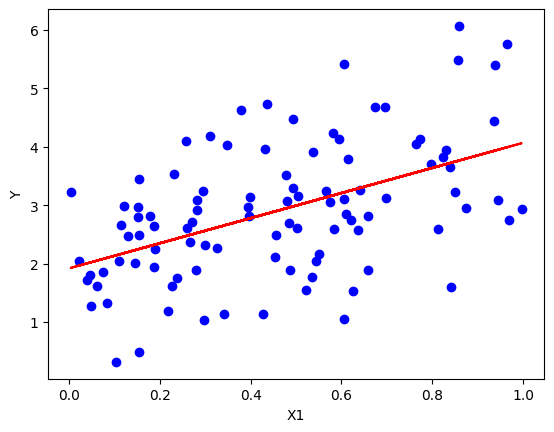

In [8]:
# Genero predicciones para hacer el gráfico de la recta del modelo junto con las observaciones en Y en función de X1
import matplotlib.pyplot as plt

X1 = df_samples['X1']
Y = df_samples['Y']

plt.scatter(X1, Y, color='blue')
plt.plot(X1, B0 + B1*X1, color='red')
plt.xlabel('X1')
plt.ylabel('Y')

Se puede notar que si bien el modelo no se ajusta del todo bien, no es tampoco tan grave. Estamos ante un caso de subajuste leve.

### (ii)
utilizando solo las muestras de 𝑋2.

Igual que en caso anterior, es simplemente ajustar un modelo de regresión simple y observar los resultados:

In [16]:
B1, B0, e = generar_regresion_lineal_simple(df_samples['X2'], df_samples['Y'])

print(f'Coeficientes del ajuste lineal de la variable Y = 2 + 2X1 + 0.3X2: B1 = {B1}, B0 = {B0}, error medio = {np.mean(e)}')

Coeficientes del ajuste lineal de la variable Y = 2 + 2X1 + 0.3X2: B2 = 2.8326503500595903, B0 = 2.275708023722198, error medio = 5.218048215738236e-16


Vemos un gráfico de como se ajusta el modelo a las observaciones de Y:

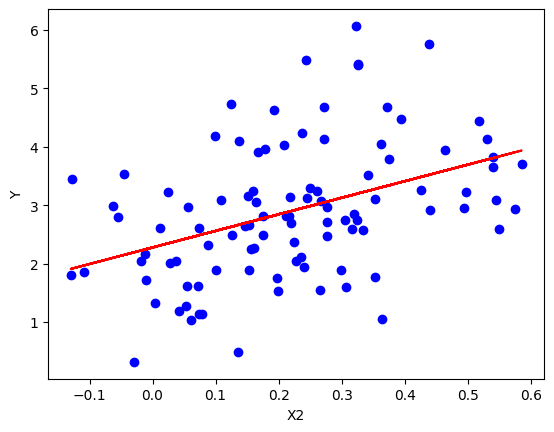

In [17]:
X2 = df_samples['X2']
Y = df_samples['Y']

plt.scatter(X2, Y, color='blue')
plt.plot(X2, B0 + B1*X2, color='red')
plt.xlabel('X2')
plt.ylabel('Y')
plt.show()

Al igual que en el caso anterior, es un modelo que no se ajusta del todo bien, pero tampoco es un mal modelo.

## d)
Graficar la distribución conjunta de 𝛽ˆ1 y 𝛽ˆ2.

### Desarrollo

Para este paso voy a realizar lo siguiente:

1. Genero listas para guardar los betas estimados
2. Hago n iteraciones, por ejemplo 1000
3. Dentro de cada iteración genero un nuevo valor para epsilon
4. En cada una uso los mismos valores de X1 y X2 pero la ecuación de Y cambiará ya que epsilon cambiará
5. Genero el gráfico solicitado

Procedo a ejecutarlo:

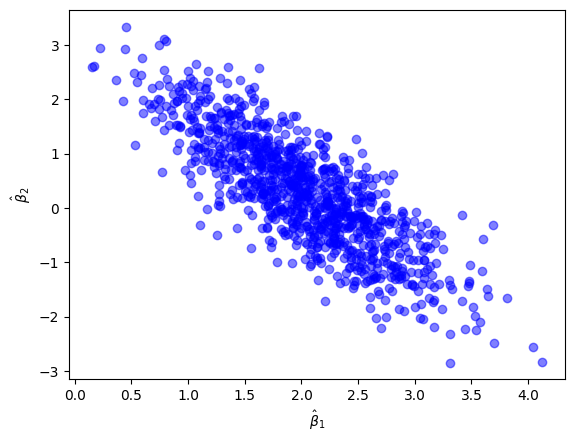

In [27]:
iteraciones = 1000

lista_beta1 = []
lista_beta2 = []

for i in range(iteraciones):

    e = norm.rvs(loc=0, scale=1, size= n)
    Y = 2 + 2*X1 + 0.3*X2 + e
    bethas = estimar_bethas(X, Y)
    
    lista_beta1.append(bethas[1])
    lista_beta2.append(bethas[2])    
    
plt.scatter(lista_beta1, lista_beta2, alpha=0.5, color='blue')
plt.xlabel('$\\hat{\\beta}_1$')
plt.ylabel('$\\hat{\\beta}_2$')
plt.show()